# Pokemon-Classification

### Well everyone know's pokemon,Dont you? But the task of identifying the pokemon into legendary or not can be subtle one.Let's try to figure it out,Through using Machine learning and Data Science.

Models to be used :

1.`RandomForest Classifier`

2.`GradientBoostingClassifier`

3.`LogisticRegression`

Workflow :

1.Importing data tools.

2.Studying data.

3.Visualizing data.

4.Modelling

5.Evaluating model

6.Experimenting with data.


## 1.Importing tools :

In [53]:
# Boiler plate tools :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## For modelling :
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Modelling tools :
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV 

## 2.Data study :

In [54]:
data = pd.read_csv('/kaggle/input/pokemon/pokemon.csv')
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [55]:
# Let's find out whether there is missing data or not...
data.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


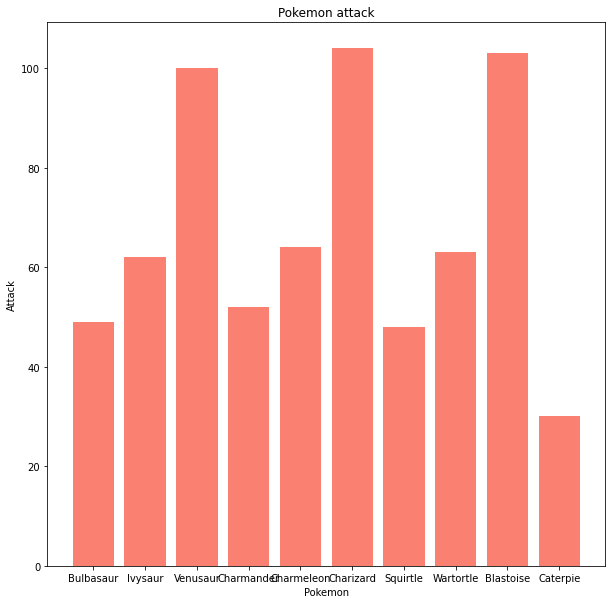

In [56]:
## The data looks quiet missing,Lets fill it.But before lets check the main metrics...
fig,axes = plt.subplots(figsize=(10,10))
axes.bar(data['name'][:10],data['attack'][:10],color='salmon');
plt.title('Pokemon attack');
plt.xlabel('Pokemon');
plt.ylabel('Attack');


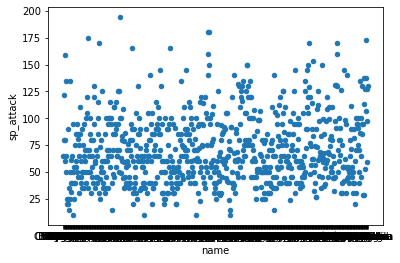

In [57]:
data.plot(kind='scatter',x='name',y='sp_attack');

In [58]:
# Lets Check the missing values...
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

height_m
percentage_male
weight_kg


In [59]:
# Fill them..
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = content.fillna(content.median())
            

In [60]:
data.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [61]:
for label,content in data.items():
    if pd.api.types.is_float_dtype(content):
        data[label] = data[label].astype('int')

In [62]:
data.dtypes

abilities            object
against_bug           int64
against_dark          int64
against_dragon        int64
against_electric      int64
against_fairy         int64
against_fight         int64
against_fire          int64
against_flying        int64
against_ghost         int64
against_grass         int64
against_ground        int64
against_ice           int64
against_normal        int64
against_poison        int64
against_psychic       int64
against_rock          int64
against_steel         int64
against_water         int64
attack                int64
base_egg_steps        int64
base_happiness        int64
base_total            int64
capture_rate         object
classfication        object
defense               int64
experience_growth     int64
height_m              int64
hp                    int64
japanese_name        object
name                 object
percentage_male       int64
pokedex_number        int64
sp_attack             int64
sp_defense            int64
speed               

In [63]:
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = data[label].astype('category')

In [64]:
data.dtypes

abilities            category
against_bug             int64
against_dark            int64
against_dragon          int64
against_electric        int64
against_fairy           int64
against_fight           int64
against_fire            int64
against_flying          int64
against_ghost           int64
against_grass           int64
against_ground          int64
against_ice             int64
against_normal          int64
against_poison          int64
against_psychic         int64
against_rock            int64
against_steel           int64
against_water           int64
attack                  int64
base_egg_steps          int64
base_happiness          int64
base_total              int64
capture_rate         category
classfication        category
defense                 int64
experience_growth       int64
height_m                int64
hp                      int64
japanese_name        category
name                 category
percentage_male         int64
pokedex_number          int64
sp_attack 

In [65]:
for label,content in data.items():
    if pd.api.types.is_categorical_dtype(content):
        data[label] = pd.Categorical(content).codes + 1

In [66]:
X = data.drop('is_legendary',axis=1)
y = data['is_legendary']

In [67]:
model_a = RandomForestClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model_a.fit(X_train,y_train)
model_a.score(X_test,y_test)

0.9937888198757764

In [68]:
model_b = GradientBoostingClassifier()
model_b.fit(X_train,y_train)
model_b.score(X_test,y_test)

0.9937888198757764

In [69]:
model_c = LogisticRegression()
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9875776397515528

## Clearly , RandomForestClassifier has highest score,Lets use it.

`RFC score = 1.0`

`GBC score = 0.9937888198757764`

`LR score = 0.9937888198757764 `

In [70]:
# Lets check the cross val score
y_preds = model_a.predict_proba(X_test)
cvm = cross_val_score(model_a,X,y,cv=10)
np.mean(cvm)

0.985

In [71]:
# Classification metrics :
y_preds = model_a.predict(X_test)

precision = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)
accuracy = accuracy_score(y_test,y_preds)
accuracy,recall,precision

(0.9937888198757764, 0.9444444444444444, 1.0)

In [72]:
## Lets get the legendary predictions : 
Pokemon = pd.DataFrame()
y_preds = model_a.predict(X)
Pokemon['Default values'] = y
Pokemon['Predictions'] = y_preds

In [73]:
Pokemon

,Default values,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
796,1,1
797,1,1
798,1,1
799,1,1


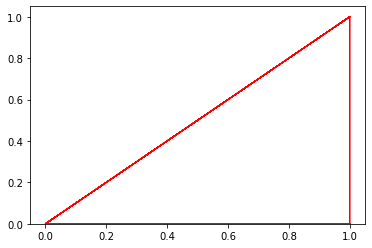

In [81]:
fig,axes = plt.subplots()
axes.stackplot(Pokemon['Default values'],Pokemon['Predictions'],color=['red','blue']);